In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.modeling.train_sentiment import train_and_evaluate_sentiment

In [4]:
sns.set(style="whitegrid")

## Training & evaluation

In [5]:
# Step 1: Execute model training and evaluation
train_and_evaluate_sentiment()
print("Sentiment model pipeline executed.")

Epoch 1/30
731/731 - 72s - loss: 1.9227 - accuracy: 0.4771 - val_loss: 0.8646 - val_accuracy: 0.6616 - lr: 0.0010 - 72s/epoch - 98ms/step
Epoch 2/30
731/731 - 234s - loss: 0.7785 - accuracy: 0.6243 - val_loss: 0.5342 - val_accuracy: 0.7245 - lr: 0.0010 - 234s/epoch - 320ms/step
Epoch 3/30
731/731 - 69s - loss: 0.5334 - accuracy: 0.7135 - val_loss: 0.5219 - val_accuracy: 0.7344 - lr: 0.0010 - 69s/epoch - 95ms/step
Epoch 4/30
731/731 - 130s - loss: 0.5660 - accuracy: 0.7017 - val_loss: 0.5351 - val_accuracy: 0.7204 - lr: 0.0010 - 130s/epoch - 178ms/step
Epoch 5/30
731/731 - 71s - loss: 0.5065 - accuracy: 0.7273 - val_loss: 0.5056 - val_accuracy: 0.7401 - lr: 0.0010 - 71s/epoch - 97ms/step
Epoch 6/30
731/731 - 73s - loss: 0.4065 - accuracy: 0.8162 - val_loss: 0.3169 - val_accuracy: 0.8870 - lr: 0.0010 - 73s/epoch - 99ms/step
Epoch 7/30
731/731 - 74s - loss: 0.3057 - accuracy: 0.8823 - val_loss: 0.2775 - val_accuracy: 0.9230 - lr: 0.0010 - 74s/epoch - 101ms/step
Epoch 8/30
731/731 - 74s - 

In [6]:
# Load metrics report
import json
with open("../outputs/sentiment_accuracy.txt", "r") as f:
    report = json.load(f)

In [7]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).T
report_df = report_df.round(3)
display(report_df)

,precision,recall,f1-score,support
extreme_negative,0.971,0.971,0.971,2695.000
negative,0.957,0.901,0.928,3943.000
neutral,0.907,0.970,0.938,3383.000
accuracy,0.943,0.943,0.943,0.943
macro avg,0.945,0.947,0.945,10021.000
weighted avg,0.944,0.943,0.943,10021.000


<Figure size 1000x400 with 0 Axes>

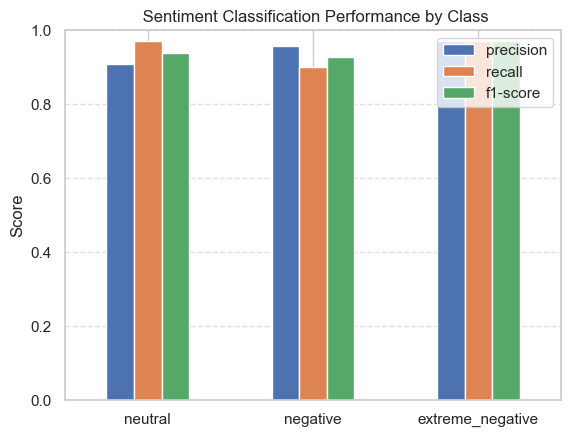

In [8]:
#  Visualize key performance metrics
plt.figure(figsize=(10, 4))
report_df.loc[["neutral", "negative", "extreme_negative"], ["precision", "recall", "f1-score"]].plot(kind="bar")
plt.title(" Sentiment Classification Performance by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [9]:
#  Sample predictions
pred_df = pd.read_csv("../outputs/predictions_sentiment.csv")
display(pred_df.sample(20))

,true_sentiment,predicted_sentiment
7521,extreme_negative,extreme_negative
9301,negative,negative
6672,negative,extreme_negative
3783,neutral,neutral
6148,neutral,neutral
8968,neutral,neutral
6746,extreme_negative,extreme_negative
1240,neutral,neutral
9080,negative,negative
7821,extreme_negative,extreme_negative
